<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/Clase_10/regresion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Regresión: Predicción del Valor de Viviendas en California

**Objetivo:** Construir un modelo de Machine Learning para predecir el valor mediano de las viviendas en distritos de California, basándose en un conjunto de atributos. Utilizaremos un `RandomForestRegressor`.

**Dataset:** California Housing. Disponible directamente desde `sklearn.datasets`.

**Pasos:**
1.  **Introducción y Objetivo:** Definir el problema y el objetivo.
2.  **Importar Librerías:** Cargar las herramientas necesarias.
3.  **Carga de Datos:** Leer el dataset.
4.  **Hipótesis:** Plantear una hipótesis clara.
5.  **Análisis Exploratorio de Datos (EDA):** Entender los datos, distribuciones, valores faltantes y relaciones.
6.  **Feature Engineering (Ingeniería de Características):** (Opcional para este ejemplo básico, pero importante en la práctica).
7.  **Preprocesamiento de Datos:** Preparar los datos para el modelo (escalado de numéricas, manejo de categóricas si las hubiera).
8.  **División de Datos:** Separar en conjuntos de entrenamiento y prueba.
9.  **Construcción y Entrenamiento del Modelo:** Usar RandomForestRegressor.
10. **Evaluación del Modelo:** Medir el rendimiento con métricas adecuadas para regresión (MAE, MSE, RMSE, R²).
11. **Análisis de Importancia de Características:** Identificar qué variables son más influyentes.
12. **Conclusiones:** Interpretar los resultados y validar/refutar la hipótesis.

## 1. Introducción y Objetivo

**Objetivo**: El objetivo es predecir el valor mediano de las viviendas (`MedHouseVal`) en bloques/distritos de California. Esta es una tarea de regresión, ya que la variable objetivo es continua.

## 2. Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Carga de Datos

In [ ]:
# Cargar el dataset de California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# La variable objetivo es 'MedHouseVal' (Median House Value)
# Las otras columnas son las características

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 4. Hipótesis

#### **Hipótesis Nula (H0)**: Las características disponibles (ingreso mediano, edad de la vivienda, número promedio de habitaciones, etc.) no son suficientes para predecir el valor mediano de las viviendas con un rendimiento significativamente mejor que un modelo base (ej. predecir siempre el valor medio). Esperaríamos un R² cercano a 0.

#### **Hipótesis Alternativa (H1)**: Es posible construir un modelo de regresión (Random Forest Regressor) utilizando las características disponibles que prediga el valor mediano de las viviendas con un coeficiente de determinación (R²) significativamente superior a 0 (idealmente > 0.5 o 0.6 para considerarlo útil) y un Error Absoluto Medio (MAE) razonablemente bajo.

## 5. Análisis Exploratorio de Datos (EDA)

### 5.1. Revisar valores faltantes

In [ ]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\nNo hay valores faltantes en el dataset.")

Valores faltantes por columna:
Series([], dtype: int64)

No hay valores faltantes en el dataset.


### 5.2. Distribución de la variable objetivo ('MedHouseVal')

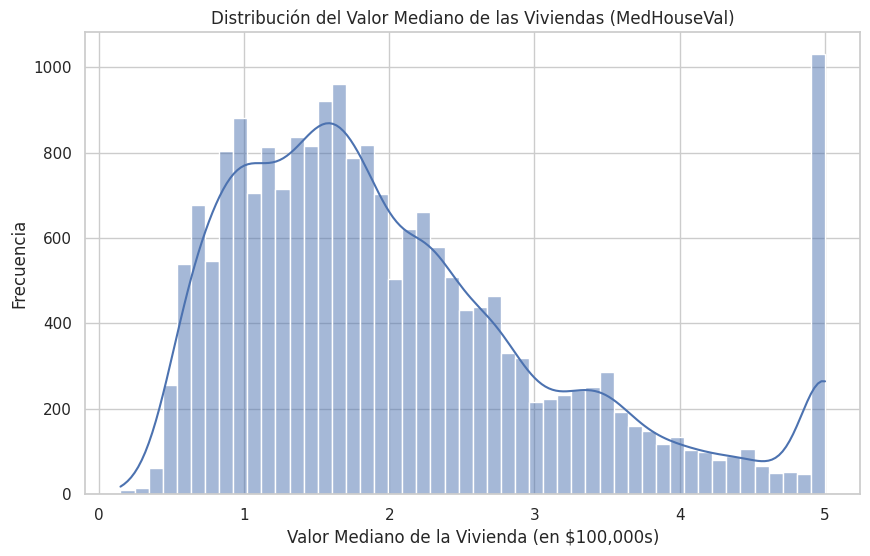

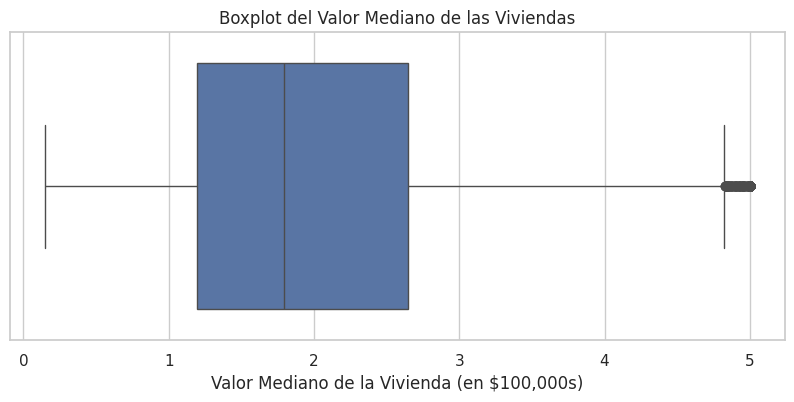

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title('Distribución del Valor Mediano de las Viviendas (MedHouseVal)')
plt.xlabel('Valor Mediano de la Vivienda (en $100,000s)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['MedHouseVal'])
plt.title('Boxplot del Valor Mediano de las Viviendas')
plt.xlabel('Valor Mediano de la Vivienda (en $100,000s)')
plt.show()

**Observación:** La variable objetivo `MedHouseVal` parece estar truncada o tener un límite superior alrededor de 5. Esto es una característica conocida del dataset (los valores por encima de 500,000 fueron agrupados en 5.00001). Esto podría afectar el rendimiento del modelo para predecir valores muy altos.

### 5.3. Análisis de variables numéricas (Características)

Características numéricas: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


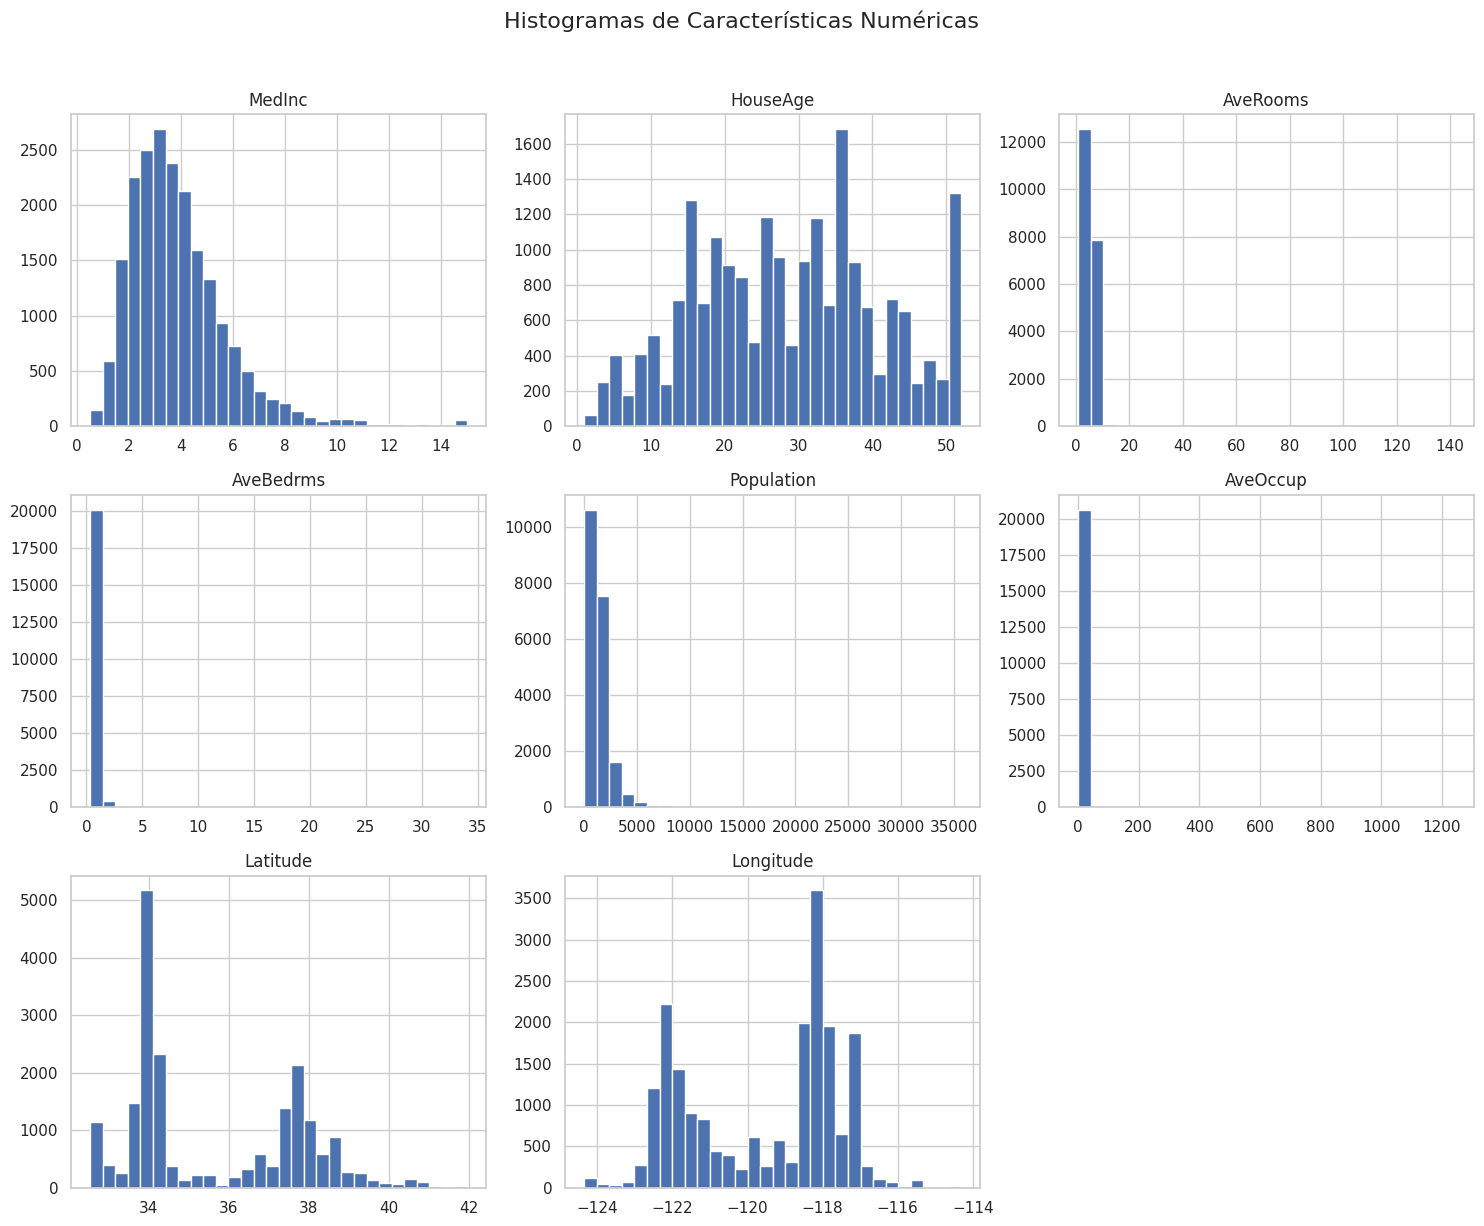

In [ ]:
numerical_features = df.drop('MedHouseVal', axis=1).columns.tolist()
print(f"Características numéricas: {numerical_features}")

# Histogramas para todas las características numéricas
df[numerical_features].hist(figsize=(15, 12), bins=30, layout=(3,3))
plt.suptitle('Histogramas de Características Numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### 5.4. Matriz de Correlación

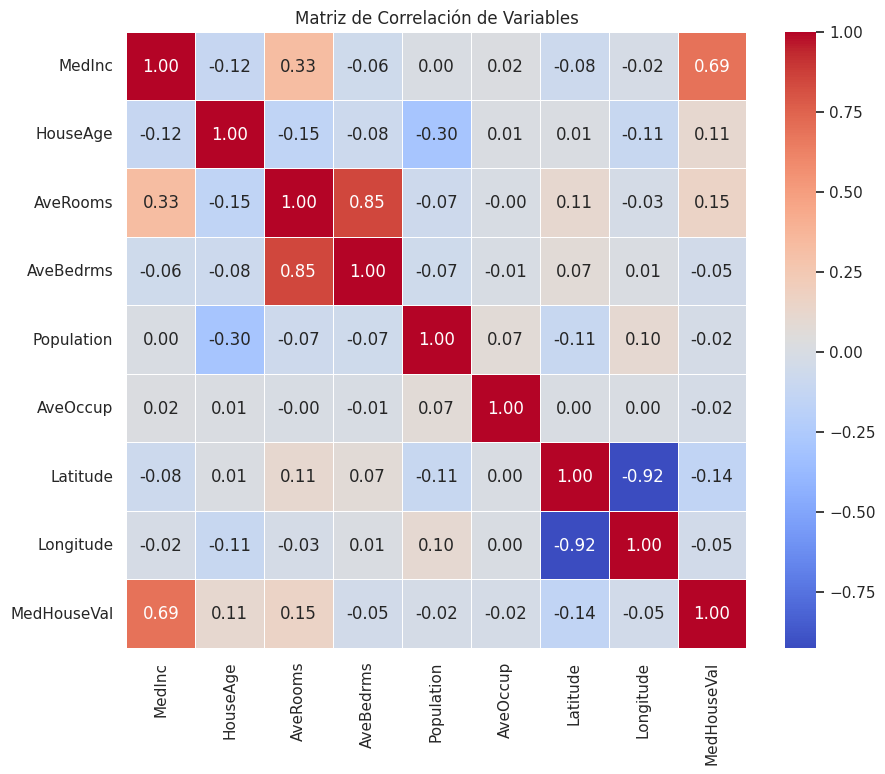


Correlaciones con la variable 'MedHouseVal':
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

print("\nCorrelaciones con la variable 'MedHouseVal':")
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))

**Observación:** `MedInc` (Ingreso Mediano) tiene la correlación positiva más alta con `MedHouseVal`. `AveRooms` también muestra una correlación positiva. `Latitude` tiene una correlación negativa moderada.

## 6. Feature Engineering (Ingeniería de Características)

Para este ejemplo básico, no realizaremos una ingeniería de características compleja. En un proyecto real, podríamos crear nuevas características como:
- `RoomsPerHousehold` = `AveRooms` (ya existe, pero si no, sería `TotRooms` / `Households`)
- `BedroomsPerRoom` = `AveBedrms` / `AveRooms`
- `PopulationPerHousehold` = `Population` / `Households`

El dataset de California Housing ya provee algunas de estas características promediadas (`AveRooms`, `AveBedrms`, `AveOccup`).

## 7. Preprocesamiento de Datos

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# En este dataset, todas las características son numéricas.
# Si tuviéramos características categóricas, las identificaríamos aquí
# y usaríamos OneHotEncoder para ellas dentro del ColumnTransformer.
numerical_features_for_scaling = X.columns.tolist()
# categorical_features_for_encoding = [] # Vacío para este dataset

In [ ]:
# Crear el preprocesador usando ColumnTransformer
# Solo necesitamos StandardScaler para las variables numéricas, ya que no hay categóricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling)
        # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding) # Si las hubiera
    ],
    remainder='passthrough' # O 'drop'
)

## 8. División de Datos (Train/Test Split)

In [ ]:
# Dividir los datos ANTES de aplicar el preprocesamiento (específicamente el escalado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (16512, 8)
Tamaño del conjunto de prueba (X_test): (4128, 8)
Tamaño del conjunto de entrenamiento (y_train): (16512,)
Tamaño del conjunto de prueba (y_test): (4128,)


## 9. Construcción y Entrenamiento del Modelo (Random Forest Regressor)

In [ ]:
# Crear el pipeline: incluye el preprocesador y el regresor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5))
    # n_estimators: número de árboles. 100 es un buen inicio.
    # random_state: para reproducibilidad.
    # n_jobs=-1: usa todos los procesadores disponibles.
    # max_depth: profundidad máxima de los árboles (ayuda a prevenir overfitting).
    # min_samples_split: número mínimo de muestras para dividir un nodo.
])

In [ ]:
# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_jobs=-1, random_state=42))])

## 10. Evaluación del Modelo

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

### 10.1. Métricas de Regresión

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas de Evaluación del Modelo de Regresión ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

print("\nInterpretación:")
print(f"- MAE: En promedio, las predicciones del modelo se desvían en ${mae*100000:,.2f} del valor real de la vivienda.")
print(f"- RMSE: Similar al MAE pero penaliza más los errores grandes. La desviación típica de los errores es de ${rmse*100000:,.2f}.")
print(f"- R²: El {r2*100:.2f}% de la varianza en el valor mediano de las viviendas puede ser explicada por las características del modelo.")

--- Métricas de Evaluación del Modelo de Regresión ---
Error Absoluto Medio (MAE): 0.3666
Error Cuadrático Medio (MSE): 0.2964
Raíz del Error Cuadrático Medio (RMSE): 0.5444
Coeficiente de Determinación (R²): 0.7738

Interpretación:
- MAE: En promedio, las predicciones del modelo se desvían en $36,662.85 del valor real de la vivienda.
- RMSE: Similar al MAE pero penaliza más los errores grandes. La desviación típica de los errores es de $54,441.46.
- R²: El 77.38% de la varianza en el valor mediano de las viviendas puede ser explicada por las características del modelo.


### 10.2. Gráfico de Predicciones vs Valores Reales

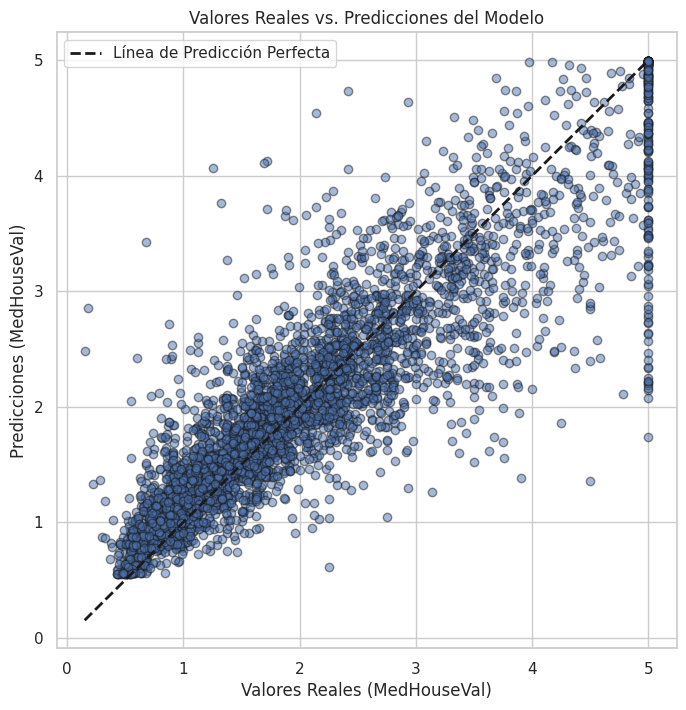

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')
plt.xlabel('Valores Reales (MedHouseVal)')
plt.ylabel('Predicciones (MedHouseVal)')
plt.title('Valores Reales vs. Predicciones del Modelo')
plt.legend()
plt.grid(True)
plt.show()

## Análisis de Importancia de Características

Importancia de las características según Random Forest Regressor:
      Feature  Importance
0      MedInc    0.595811
5    AveOccup    0.139787
6    Latitude    0.076312
7   Longitude    0.076039
1    HouseAge    0.047684
2    AveRooms    0.031201
4  Population    0.016678
3   AveBedrms    0.016488


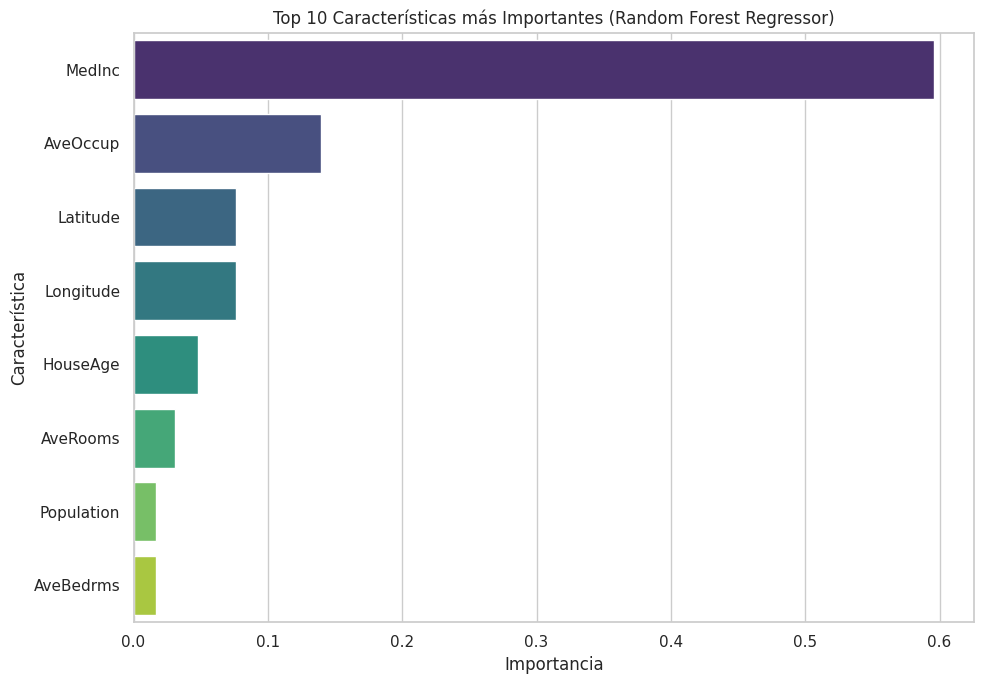

In [ ]:
# Acceder al regresor DENTRO del pipeline
regressor_model = model_pipeline.named_steps['regressor']
importances = regressor_model.feature_importances_

# Obtener los nombres de las características después del preprocesamiento
# En este caso, como solo tenemos StandardScaler, los nombres de las características originales son los mismos.
# Si tuviéramos OneHotEncoder, necesitaríamos obtener los nombres de las columnas generadas por él.
feature_names = X_train.columns # Las características originales

# Crear un DataFrame para visualizar la importancia
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Importancia de las características según Random Forest Regressor:")
print(feature_importance_df.head(10)) # Mostrar las 10 más importantes

# Graficar la importancia de las características
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis', hue='Feature', dodge=False)
plt.title('Top 10 Características más Importantes (Random Forest Regressor)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.legend([],[], frameon=False) # Ocultar leyenda si no es necesaria
plt.tight_layout()
plt.show()

## 12. Conclusiones

In [ ]:
print("Resumen de Resultados del Modelo de Regresión:")
print(f"- Error Absoluto Medio (MAE): {mae:.4f} (aproximadamente ${mae*100000:,.0f})")
print(f"- Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f} (aproximadamente ${rmse*100000:,.0f})")
print(f"- Coeficiente de Determinación (R²): {r2:.4f}")
print("- Las características más importantes fueron: " + ", ".join(feature_importance_df['Feature'].head(3).tolist()) + ".")

Resumen de Resultados del Modelo de Regresión:
- Error Absoluto Medio (MAE): 0.3666 (aproximadamente $36,663)
- Raíz del Error Cuadrático Medio (RMSE): 0.5444 (aproximadamente $54,441)
- Coeficiente de Determinación (R²): 0.7738
- Las características más importantes fueron: MedInc, AveOccup, Latitude.


**Validación de la Hipótesis:**

La hipótesis alternativa (H1) planteaba que era posible predecir el valor mediano de las viviendas con un R² significativamente > 0 (idealmente > 0.5 o 0.6) y un MAE razonable.


In [ ]:
print(f"Obtuvimos un R² de {r2:.2f} y un MAE de {mae:.2f} (que corresponde a ${mae*100000:,.0f}).")

if r2 > 0.5: # Umbral de ejemplo para R²
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo explica una porción considerable de la varianza y es significativamente mejor que un modelo base.")
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada o el modelo tiene un rendimiento bajo (R² <= 0.5).")
    print("Se podría necesitar mejorar el modelo, realizar más ingeniería de características o considerar si las características actuales son suficientes.")

Obtuvimos un R² de 0.77 y un MAE de 0.37 (que corresponde a $36,663).
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo explica una porción considerable de la varianza y es significativamente mejor que un modelo base.
Rechazamos la hipótesis nula (H0).
